# Question 1:  Effect of Normalization, Feature Extraction and Distance Metrics

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree
import matplotlib
import time
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
print("W ", wine_w.shape)
wine_r[C]= np.ones(wine_r.shape[0])
print("R ", wine_r.shape)
wine = pd.concat([wine_w,wine_r])
print("Combined ", wine.shape)
print("Columns: ", wine.columns.values)

W  (4898, 13)
R  (1599, 13)
Combined  (6497, 13)
Columns:  ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality' 'color']


Exploring the Wine dataset

In [3]:
wine[D].describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol  
count  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801  
std       0.160787     0.148806     1.192712  
min       2.720000     0.220000     8.000000  
25%       3.110000     0.430000     9.500000  
50%       3.210000     0.510000    10.300000  
75%       3.320000     0.600000    11.300000  
max       4.010000     2.000000    14.900000

In [4]:
print(wine)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [5]:
print(wine.shape)

(6497, 13)


In [6]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null float64
dtypes: float64(12), int64(1)
memory usage: 710.6 KB


### 1.1 Tasks

Wine Dataset - Pairplots of the Wine dataset with respect to 'Color' before normalization

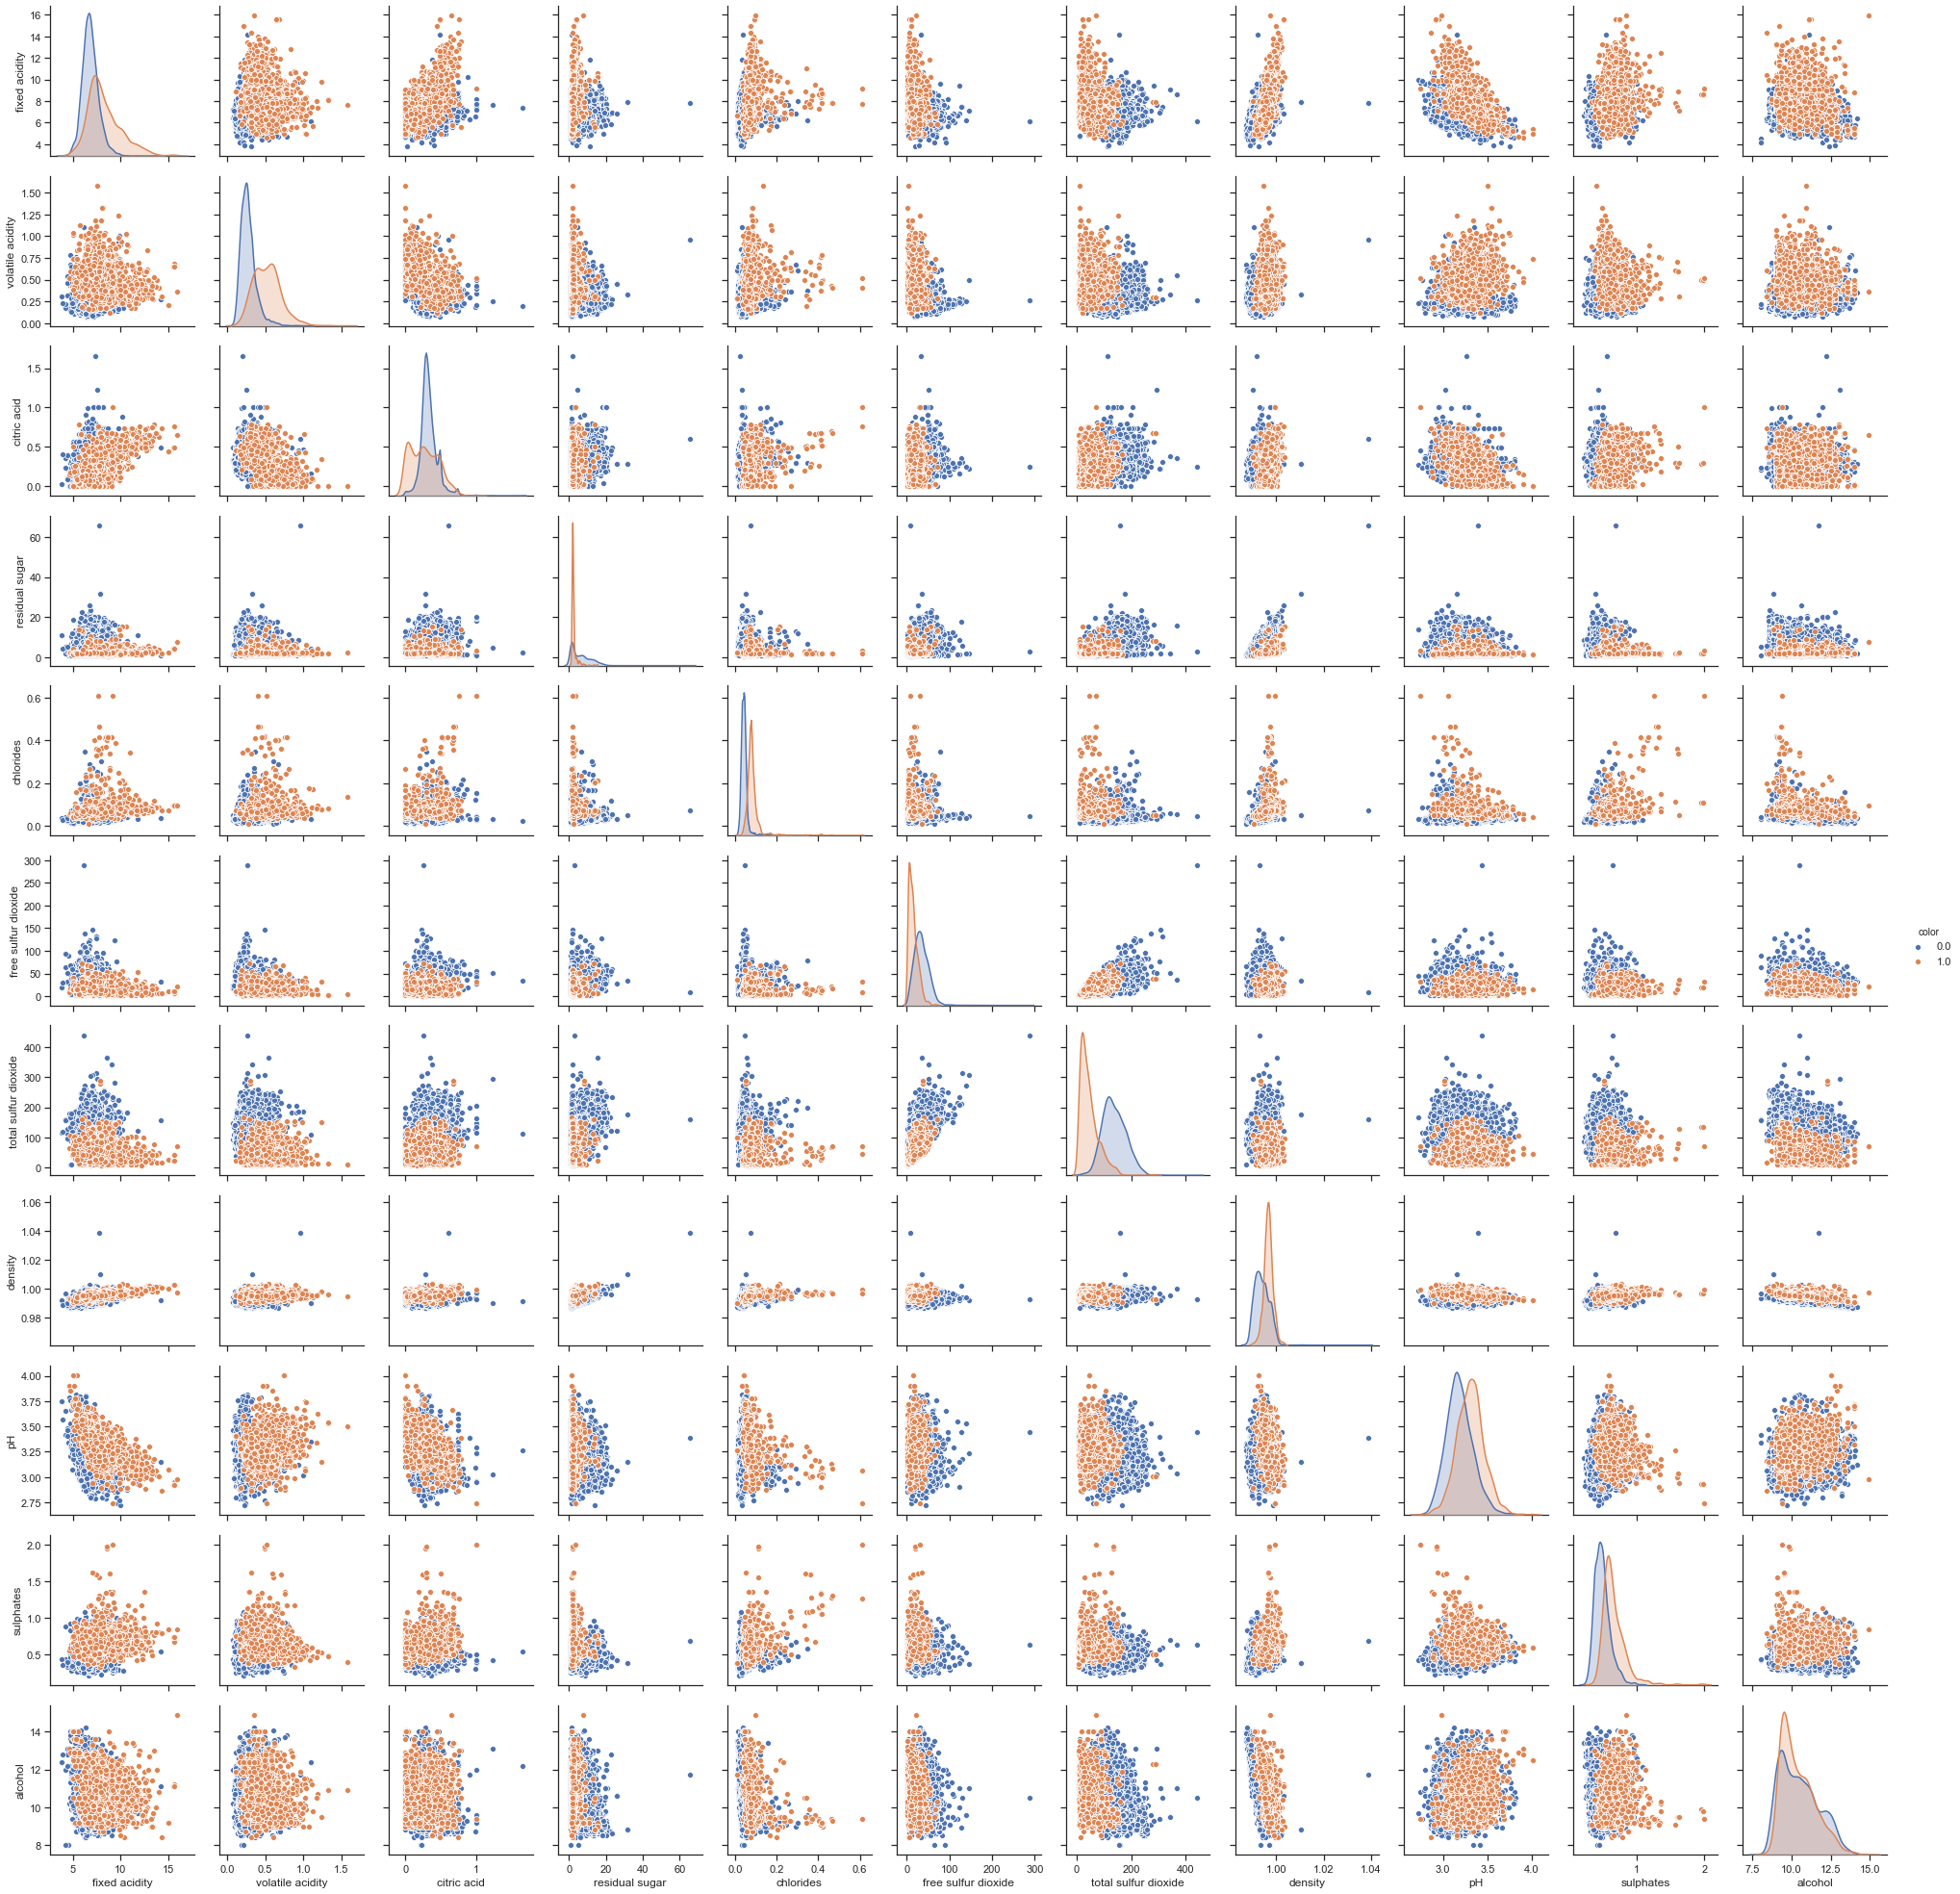

In [7]:
columns_to_plot = list(wine.columns)
columns_to_plot.remove('color')
columns_to_plot.remove('quality')
sns.pairplot(wine, hue = 'color', vars=columns_to_plot)

In [8]:
# classify color of wine with all features
X = wine[D].values
y = np.ravel(wine[C])
print(X)
print(y)

[[ 7.     0.27   0.36  ...  3.     0.45   8.8  ]
 [ 6.3    0.3    0.34  ...  3.3    0.49   9.5  ]
 [ 8.1    0.28   0.4   ...  3.26   0.44  10.1  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]
[0. 0. 0. ... 1. 1. 1.]


In [9]:
X_pd = pd.DataFrame(X,y)
print(X_pd.shape)
X_pd.head()

(6497, 11)


0     1     2     3      4     5      6       7     8     9    10
0.0  7.0  0.27  0.36  20.7  0.045  45.0  170.0  1.0010  3.00  0.45   8.8
0.0  6.3  0.30  0.34   1.6  0.049  14.0  132.0  0.9940  3.30  0.49   9.5
0.0  8.1  0.28  0.40   6.9  0.050  30.0   97.0  0.9951  3.26  0.44  10.1
0.0  7.2  0.23  0.32   8.5  0.058  47.0  186.0  0.9956  3.19  0.40   9.9
0.0  7.2  0.23  0.32   8.5  0.058  47.0  186.0  0.9956  3.19  0.40   9.9

## Normalization

    Using Z-Score normalization to normalize the Wine dataset

In [10]:
#Z-Score normalization
from scipy import stats
norm_wine = stats.zscore(wine)
np.info(norm_wine)

# classify color of wine with all features
X = stats.zscore(wine[D].values)
lab_enc = preprocessing.LabelEncoder()
Y_temp = stats.zscore(np.ravel(wine[[C]]))
y = lab_enc.fit_transform(Y_temp)

class:  ndarray
shape:  (6497, 13)
strides:  (8, 51976)
itemsize:  8
aligned:  True
contiguous:  False
fortran:  True
data pointer: 0x27f2c114ff0
byteorder:  little
byteswap:  False
type: float64


### After normalization

    Pairplots of the Wine dataset with respect to 'Color' after normalization

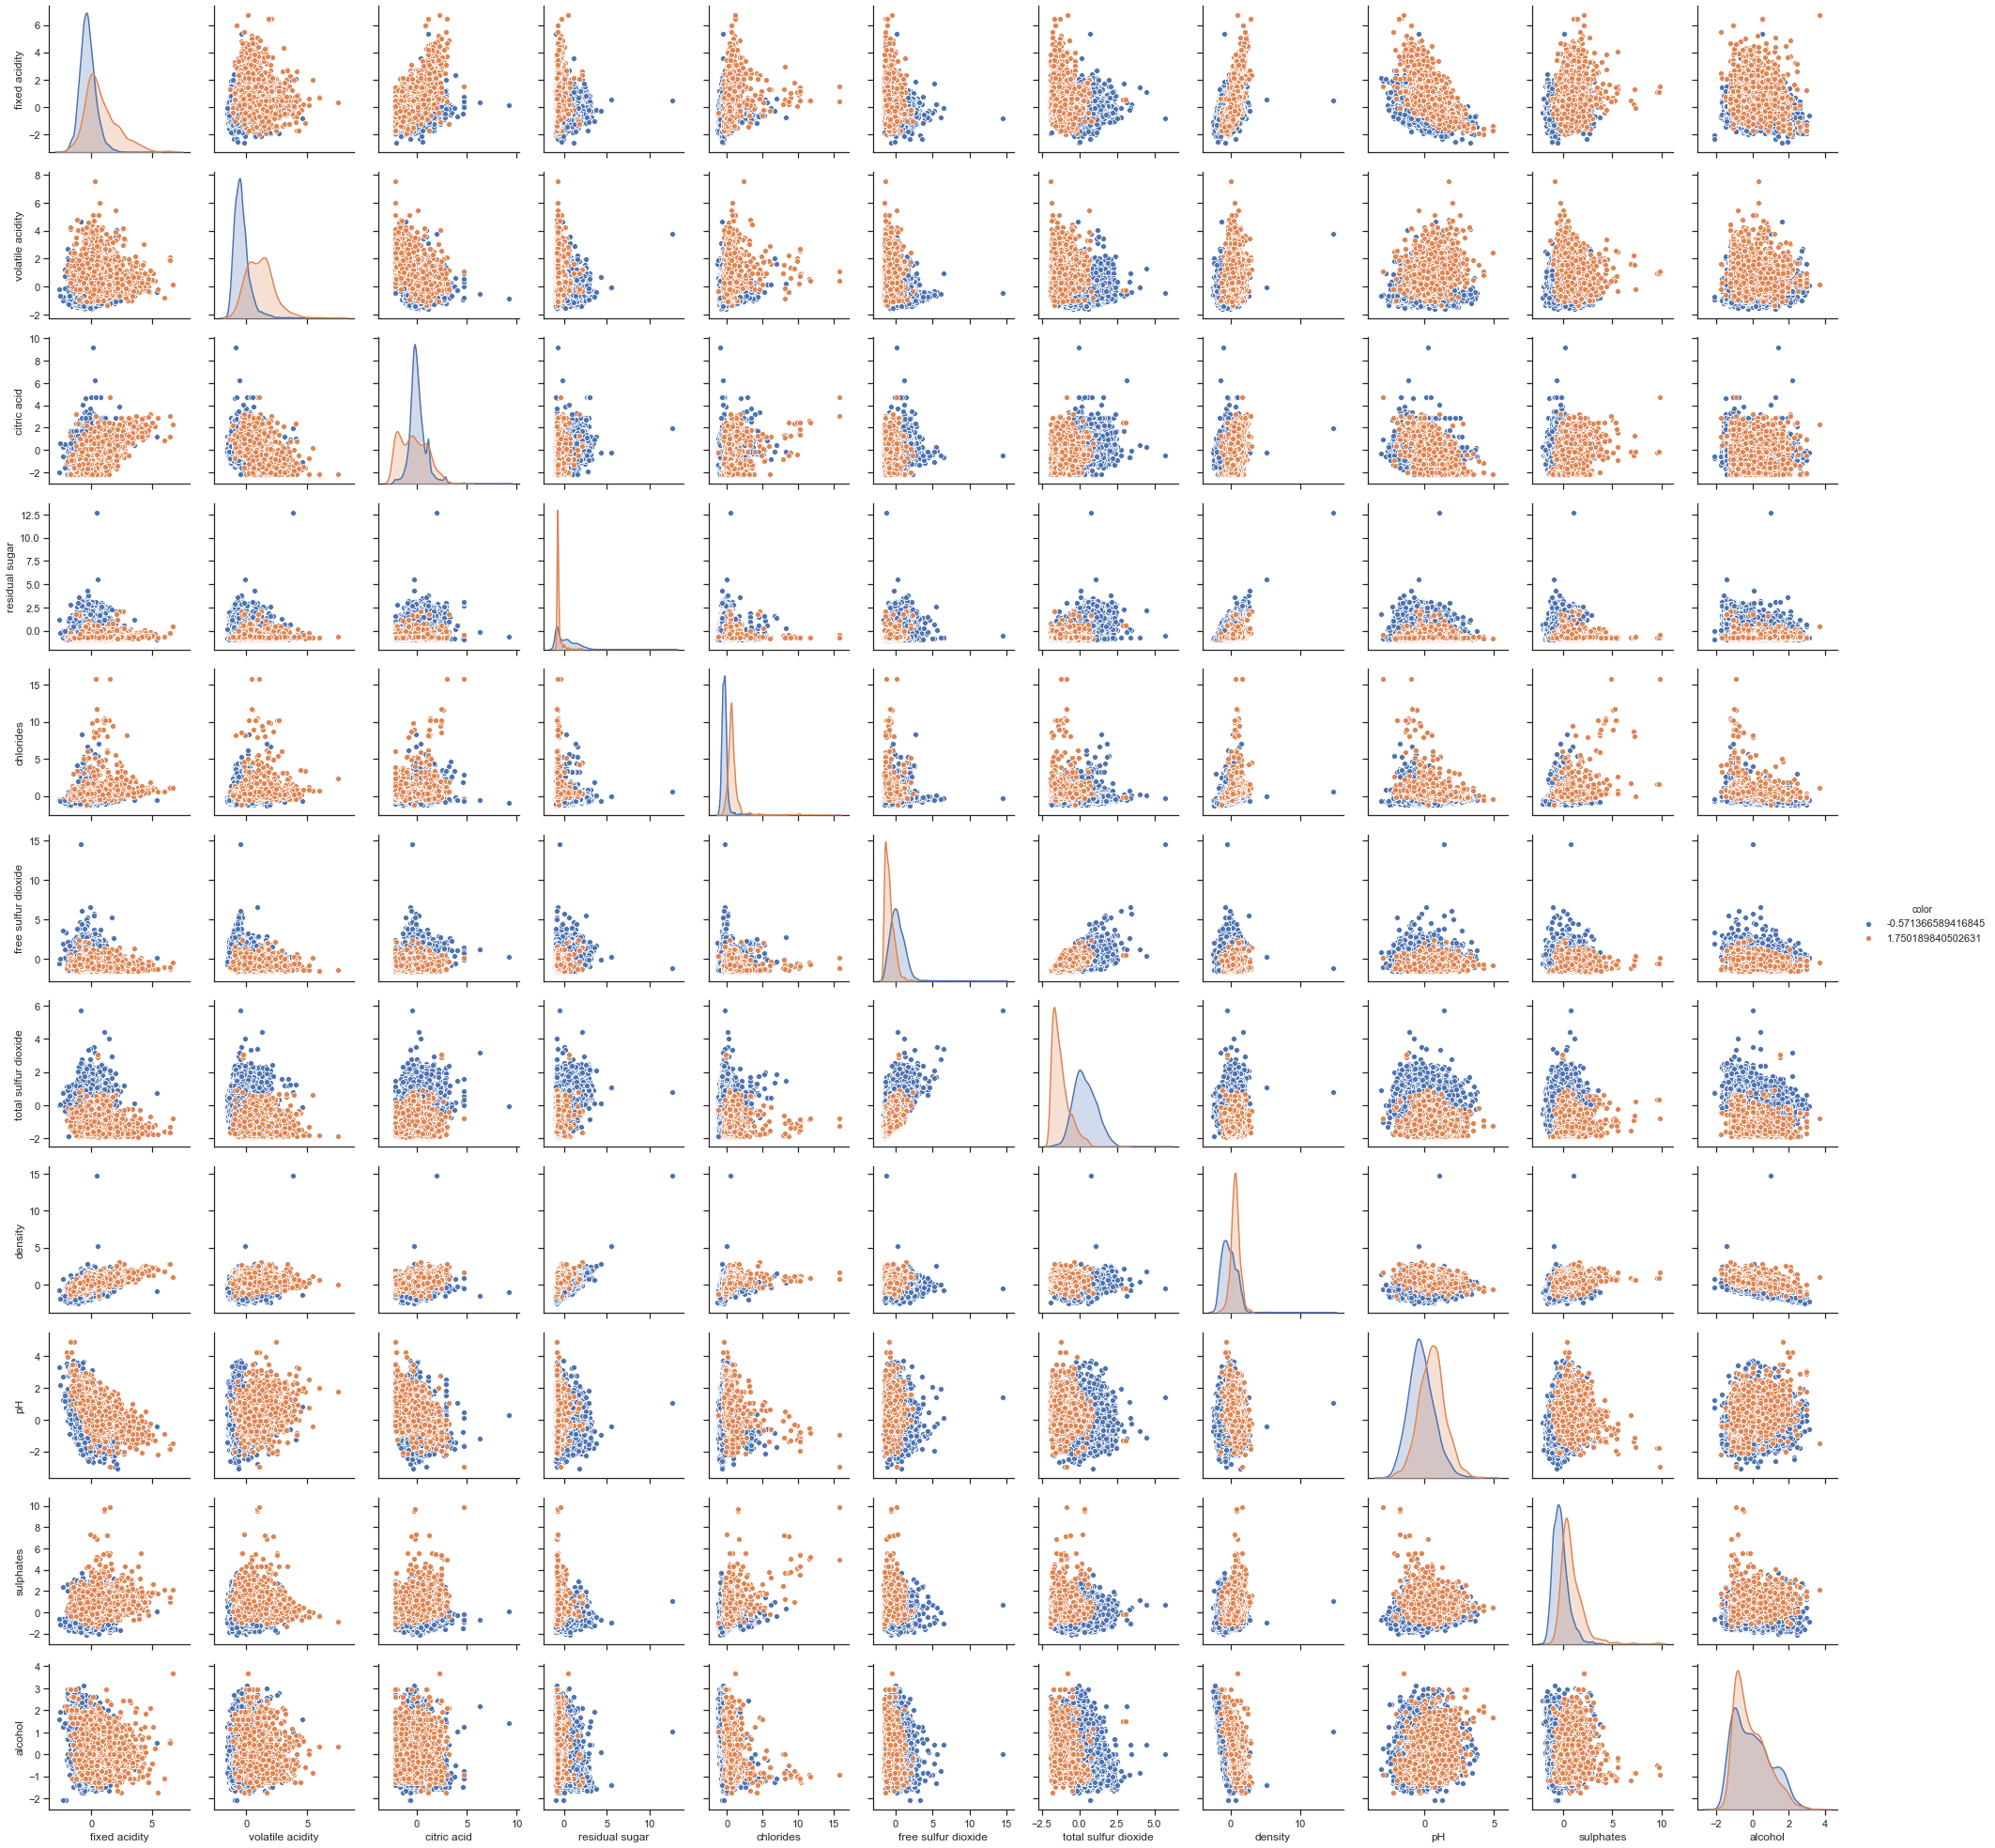

In [11]:
new_df = pd.DataFrame(norm_wine, columns = wine.columns)
new_df_columns = list(new_df.columns)
new_df_columns.remove('color')
new_df_columns.remove('quality')
sns.pairplot(new_df, vars=new_df_columns, hue = 'color')

Comparing the feature 'density' before and after normalization: 


 The class -- density with all other columns before normalization 



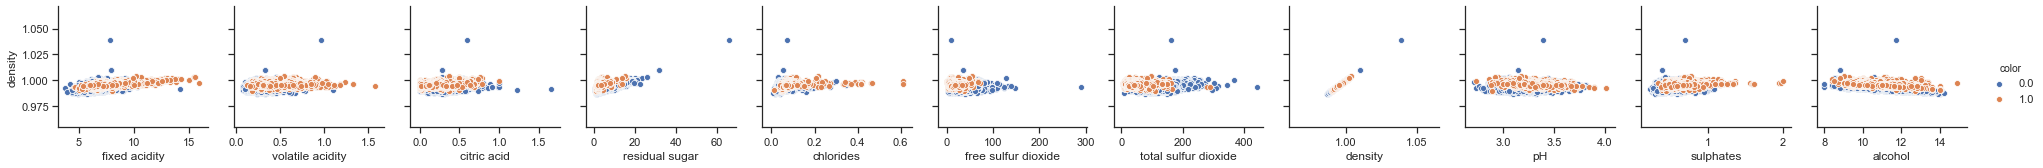

In [12]:
columns_to_plot = list(wine.columns)
columns_to_plot.remove('color')
columns_to_plot.remove('quality')

print('\n The class -- density with all other columns before normalization \n')
sns.pairplot(wine, hue = 'color', y_vars = columns_to_plot[7], x_vars=columns_to_plot)



 The class -- density with all other columns after normalization 



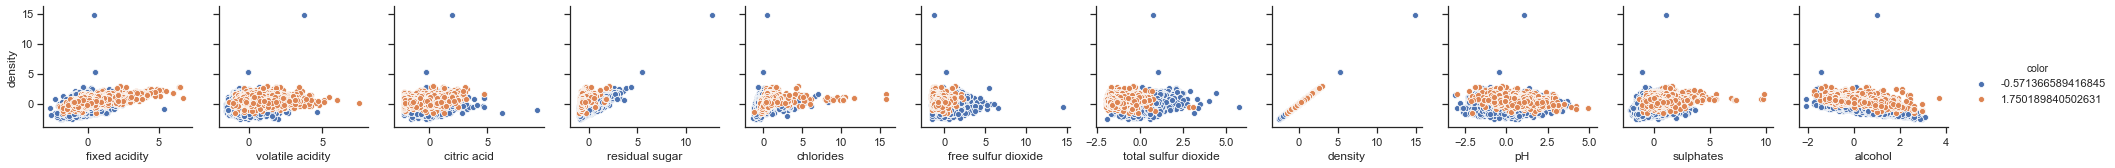

In [13]:
print('\n The class -- density with all other columns after normalization \n')
sns.pairplot(new_df, y_vars = new_df_columns[7], x_vars=new_df_columns, hue = 'color')

## Train/Test Data Split

In [14]:
#Spliting the data into train and test
ran = 42 # random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran) 

## Classifications

#### KNN on normalized data

In [15]:
n_neighborslist = list(range(1,60))
accarray = np.zeros((len(n_neighborslist),1))

#### 1) KNN with ***'Uniform'*** Weighting

In [16]:
#KNN with Uniform weighting scheme
col_names=['Uniform']

start_time1 = time.time()

#add multiple plots to same chart, one for each weighting approach
acc_uni_n=pd.DataFrame(accarray, columns=col_names)

scores_val_uni_n = {}

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights="uniform")
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc_uni_n.at[k,col_names[0]] = accscore
    scores_val_uni_n[k] = accscore

c_m1 = confusion_matrix(y_test, y_pred)

print("Confusion matrix: \n")
print(c_m1, '\n')
print("\nTotal Misclassification: 14\n")
print("\nThe time taken is : %s seconds " % (time.time() - start_time1), '\n')
print("\nWeighting scheme : Uniform - \n")

{"For Value of K "+ str(k): "The accuracy is " + str(v) for k, v in sorted(scores_val_uni_n.items(), key=lambda item: item[1],reverse=True)[:5]}




Confusion matrix: 

[[979   7]
 [  7 307]] 


Total Misclassification: 14


The time taken is : 6.922436237335205 seconds  


Weighting scheme : Uniform - 



{'For Value of K 3': 'The accuracy is 0.9946153846153846',
 'For Value of K 4': 'The accuracy is 0.9946153846153846',
 'For Value of K 1': 'The accuracy is 0.9938461538461538',
 'For Value of K 2': 'The accuracy is 0.9930769230769231',
 'For Value of K 6': 'The accuracy is 0.9930769230769231'}

Obeservation: Maximum Accuracy = 99.46%

#### 2) KNN with distance based weight with ***'Manhattan'*** distance

In [17]:
col_names=['Manhattan']
scores_val_man_n = {}

start_time2 = time.time()

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, p=1, metric = 'manhattan', weights = 'distance')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc_uni_n.at[k,col_names[0]] = accscore
    scores_val_man_n[k] = accscore

c_m2 = confusion_matrix(y_test, y_pred)

print("Confusion matrix: \n")
print(c_m2, '\n')
print("\nTotal Misclassification: 9\n")
print("\n The time taken is : %s seconds " % (time.time() - start_time2), '\n')

print("\nWeighting scheme : Manhattan - \n")
{"For Value of K "+ str(k): "The accuracy is " + str(v) for k, v in sorted(scores_val_man_n.items(), key=lambda item: item[1],reverse=True)[:5]}

Confusion matrix: 

[[983   3]
 [  6 308]] 


Total Misclassification: 9


 The time taken is : 5.497323989868164 seconds  


Weighting scheme : Manhattan - 



{'For Value of K 23': 'The accuracy is 0.9969230769230769',
 'For Value of K 24': 'The accuracy is 0.9969230769230769',
 'For Value of K 25': 'The accuracy is 0.9969230769230769',
 'For Value of K 26': 'The accuracy is 0.9969230769230769',
 'For Value of K 28': 'The accuracy is 0.9969230769230769'}

Obeservation: Maximum Accuracy = 99.69% 

#### 3) KNN with distance based weight with ***'Euclidean'*** distance

In [18]:
col_names=['Euclidean']
scores_val_ecu_n = {}

start_time3 = time.time()

for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, p=2, metric = 'euclidean', weights = 'distance')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc_uni_n.at[k,col_names[0]] = accscore
    scores_val_ecu_n[k] = accscore

c_m3 = confusion_matrix(y_test, y_pred)

print("Confusion matrix: \n")
print(c_m3, '\n')
print("\nTotal Misclassification: 13\n")
print("\n The time taken is : %s seconds " % (time.time() - start_time3), '\n')

print("\nWeighting scheme : Euclidean - \n")
{"For Value of K "+ str(k): "The accuracy is " + str(v) for k, v in sorted(scores_val_ecu_n.items(), key=lambda item: item[1],reverse=True)[:5]}

Confusion matrix: 

[[980   6]
 [  7 307]] 


Total Misclassification: 13


 The time taken is : 5.427335500717163 seconds  


Weighting scheme : Euclidean - 



{'For Value of K 3': 'The accuracy is 0.9953846153846154',
 'For Value of K 4': 'The accuracy is 0.9953846153846154',
 'For Value of K 10': 'The accuracy is 0.9946153846153846',
 'For Value of K 1': 'The accuracy is 0.9938461538461538',
 'For Value of K 2': 'The accuracy is 0.9938461538461538'}

Obeservation: Maximum Accuracy = 99.53%

Text(0, 0.5, 'Accuracy')

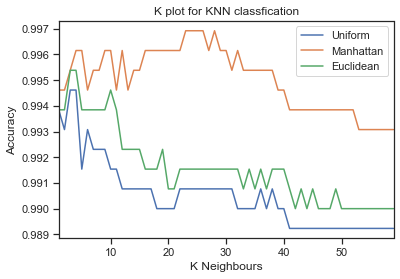

In [19]:
acc_uni_n[1:].plot.line()
plt.title("K plot for KNN classfication")
plt.xlabel("K Neighbours")
plt.ylabel("Accuracy")

## Feature Extraction

#### PCA with different KNN weighting schemes

In [20]:
#fitting train and test data on the normalized dataset
pca = PCA(n_components = 5, random_state = ran)
pca_model = pca.fit_transform(X_train)
x_new_test = pca.transform(X_test)

#### 1) PCA with KNN with ***'Uniform'*** Weighting

In [21]:
#PCA KNN with Uniform weighting scheme
col_names=['Uniform']

start_time4 = time.time()

#add multiple plots to same chart, one for each weighting approach
acc_pca=pd.DataFrame(accarray, columns=col_names)

scores_val_uni_pca = {}

for k in n_neighborslist:
    knn = KNeighborsClassifier(n_neighbors = k, weights="uniform")
    knn.fit(pca_model, y_train)
    y_pred = knn.predict(x_new_test)
    accscore = accuracy_score(y_test, y_pred)
    acc_pca.at[k,col_names[0]] = accscore
    scores_val_uni_pca[k] = accscore
    
knn_c_m1 = confusion_matrix(y_test, y_pred)

print("Confusion matrix: \n")
print(knn_c_m1, '\n')
print("\nTotal Misclassification: 15\n")
print("\n The time taken is : %s seconds " % (time.time() - start_time4), '\n')

print("\nPCA with KNN - Weighting scheme : Uniform - \n")
{"For Value of K "+ str(k): "The accuracy is " + str(v) for k, v in sorted(scores_val_uni_pca.items(), key=lambda item: item[1],reverse=True)[:5]}

Confusion matrix: 

[[980   6]
 [  9 305]] 


Total Misclassification: 15


 The time taken is : 2.912196159362793 seconds  


PCA with KNN - Weighting scheme : Uniform - 



{'For Value of K 1': 'The accuracy is 0.9915384615384616',
 'For Value of K 38': 'The accuracy is 0.9884615384615385',
 'For Value of K 39': 'The accuracy is 0.9884615384615385',
 'For Value of K 40': 'The accuracy is 0.9884615384615385',
 'For Value of K 42': 'The accuracy is 0.9884615384615385'}

Obeservation: Maximum Accuracy = 98.84%

#### 2) PCA with KNN with distance based weight with ***'Manhattan'*** distance

In [22]:
#PCA KNN with Manhattan weighting scheme
col_names=['Manhattan']
scores_val_man_pca = {}

start_time5 = time.time()

for k in n_neighborslist:
    knn = KNeighborsClassifier(n_neighbors = k, p = 1, metric = 'manhattan', weights = 'distance')
    knn.fit(pca_model, y_train)
    y_pred = knn.predict(x_new_test)
    accscore = accuracy_score(y_test, y_pred)
    acc_pca.at[k,col_names[0]] = accscore
    scores_val_man_pca[k] = accscore
    
knn_c_m2 = confusion_matrix(y_test, y_pred)

print("Confusion matrix: \n")
print(knn_c_m2, '\n')
print("\nTotal Misclassification: 14\n")
print("\n The time taken is : %s seconds " % (time.time() - start_time5), '\n')

print("\nPCA with KNN - Weighting scheme : Manhattan - \n")
{"For Value of K "+ str(k): "The accuracy is " + str(v) for k, v in sorted(scores_val_man_pca.items(), key=lambda item: item[1],reverse=True)[:5]}

Confusion matrix: 

[[981   5]
 [  9 305]] 


Total Misclassification: 14


 The time taken is : 1.5233733654022217 seconds  


PCA with KNN - Weighting scheme : Manhattan - 



{'For Value of K 9': 'The accuracy is 0.9907692307692307',
 'For Value of K 11': 'The accuracy is 0.9907692307692307',
 'For Value of K 12': 'The accuracy is 0.9907692307692307',
 'For Value of K 1': 'The accuracy is 0.99',
 'For Value of K 2': 'The accuracy is 0.99'}

Obeservation: Maximum Accuracy = 99.07%

#### 3) PCA with KNN with distance based weight with ***'Euclidean'*** distance

In [23]:
#PCA KNN with Euclidean weighting scheme
col_names=['Euclidean']
scores_val_ecu_pca = {}

start_time6 = time.time()

for k in n_neighborslist:
    knn = KNeighborsClassifier(n_neighbors = k, p = 2, metric = 'euclidean', weights = 'distance')
    knn.fit(pca_model, y_train)
    y_pred = knn.predict(x_new_test)
    accscore = accuracy_score(y_test, y_pred)
    acc_pca.at[k,col_names[0]] = accscore
    scores_val_ecu_pca[k] = accscore
    
knn_c_m3 = confusion_matrix(y_test, y_pred)

print("Confusion matrix: \n")
print(knn_c_m3, '\n')
print("\nTotal Misclassification: 14\n")
print("\n The time taken is : %s seconds " % (time.time() - start_time6), '\n')

print("\nPCA with Weighting scheme : Euclidean - \n")
{"For Value of K "+ str(k): "The accuracy is " + str(v) for k, v in sorted(scores_val_ecu_pca.items(), key=lambda item: item[1],reverse=True)[:5]}

Confusion matrix: 

[[981   5]
 [  9 305]] 


Total Misclassification: 14


 The time taken is : 1.6306703090667725 seconds  


PCA with Weighting scheme : Euclidean - 



{'For Value of K 1': 'The accuracy is 0.9915384615384616',
 'For Value of K 2': 'The accuracy is 0.9915384615384616',
 'For Value of K 4': 'The accuracy is 0.9907692307692307',
 'For Value of K 11': 'The accuracy is 0.99',
 'For Value of K 12': 'The accuracy is 0.99'}

Obeservation: Maximum Accuracy = 99.15%

Text(0, 0.5, 'Accuracy')

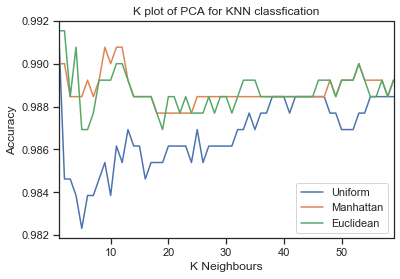

In [24]:
acc_pca[1:].plot.line()
plt.title("K plot of PCA for KNN classfication")
plt.xlabel("K Neighbours")
plt.ylabel("Accuracy")

#### LDA with different KNN weighting schemes

In [25]:
#fitting train and test data on the normalized dataset
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit_transform(X_train, y_train)
x_new_test = lda.transform(X_test)

#### 1) LDA with KNN with ***'Uniform'*** Weighting

In [26]:
#LDA KNN with Uniform weighting scheme
col_names=['Uniform']

start_time7 = time.time()

#add multiple plots to same chart, one for each weighting approach
acc_lda=pd.DataFrame(accarray, columns=col_names)

scores_val_uni_lda = {}

for k in n_neighborslist:
    knn = KNeighborsClassifier(n_neighbors = k, weights="uniform")
    knn.fit(lda_model, y_train)
    y_pred = knn.predict(x_new_test)
    accscore = accuracy_score(y_test, y_pred)
    acc_lda.at[k,col_names[0]] = accscore
    scores_val_uni_lda[k] = accscore

knn_c_m4 = confusion_matrix(y_test, y_pred)

print("Confusion matrix: \n")
print(knn_c_m4, '\n')
print("\nTotal Misclassification: 8\n")
print("\n The time taken is : %s seconds " % (time.time() - start_time7), '\n')
    
print("\nLDA with Weighting scheme : Uniform - \n")
{"For Value of K "+ str(k): "The accuracy is " + str(v) for k, v in sorted(scores_val_uni_lda.items(), key=lambda item: item[1],reverse=True)[:5]}

Confusion matrix: 

[[982   4]
 [  4 310]] 


Total Misclassification: 8


 The time taken is : 1.6336286067962646 seconds  


LDA with Weighting scheme : Uniform - 



{'For Value of K 6': 'The accuracy is 0.9946153846153846',
 'For Value of K 7': 'The accuracy is 0.9946153846153846',
 'For Value of K 8': 'The accuracy is 0.9946153846153846',
 'For Value of K 9': 'The accuracy is 0.9946153846153846',
 'For Value of K 10': 'The accuracy is 0.9946153846153846'}

Obeservation: Maximum Accuracy = 99.46%

#### 2) LDA with KNN with distance based weight with ***'Manhattan'*** distance

In [27]:
#LDA KNN with Manhattan weighting scheme
col_names=['Manhattan']
scores_val_man_lda = {}

start_time8 = time.time()

for k in n_neighborslist:
    knn = KNeighborsClassifier(n_neighbors = k, p =1 , weights = 'distance', metric = 'manhattan')
    knn.fit(lda_model, y_train)
    y_pred = knn.predict(x_new_test)
    accscore = accuracy_score(y_test, y_pred)
    acc_lda.at[k,col_names[0]] = accscore
    scores_val_man_lda[k] = accscore
    
knn_c_m5 = confusion_matrix(y_test, y_pred)

print("Confusion matrix: \n")
print(knn_c_m5, '\n')
print("\nTotal Misclassification: 9\n")
print("\n The time taken is : %s seconds " % (time.time() - start_time8), '\n')

print("\nLDA with Weighting scheme : Manhattan - \n")
{"For Value of K "+ str(k): "The accuracy is " + str(v) for k, v in sorted(scores_val_man_lda.items(), key=lambda item: item[1],reverse=True)[:5]}

Confusion matrix: 

[[984   2]
 [  7 307]] 


Total Misclassification: 9


 The time taken is : 0.35804176330566406 seconds  


LDA with Weighting scheme : Manhattan - 



{'For Value of K 27': 'The accuracy is 0.9930769230769231',
 'For Value of K 28': 'The accuracy is 0.9930769230769231',
 'For Value of K 29': 'The accuracy is 0.9930769230769231',
 'For Value of K 33': 'The accuracy is 0.9930769230769231',
 'For Value of K 34': 'The accuracy is 0.9930769230769231'}

Obeservation: Maximum Accuracy = 99.30%

#### 3) LDA with KNN with distance based weight with ***'Euclidean'*** distance

In [28]:
#LDA KNN with Eculidean weighting scheme
col_names=['Euclidean']
scores_val_ecu_lda = {}#### 2) PCA with KNN with distance based weight with ***'Manhattan'*** distance

start_time9 = time.time()

for k in n_neighborslist:
    knn = KNeighborsClassifier(n_neighbors = k, p = 2 , weights = 'distance', metric = 'euclidean')
    knn.fit(lda_model, y_train)
    y_pred = knn.predict(x_new_test)
    accscore = accuracy_score(y_test, y_pred)
    acc_lda.at[k,col_names[0]] = accscore
    scores_val_ecu_lda[k] = accscore

knn_c_m6 = confusion_matrix(y_test, y_pred)

print("Confusion matrix: \n")
print(knn_c_m6, '\n')
print("\nTotal Misclassification: 9\n")
print("\n The time taken is : %s seconds " % (time.time() - start_time9), '\n')

print("\nLDA with Weighting scheme : Euclidean - \n")
{"For Value of K "+ str(k): "The accuracy is " + str(v) for k, v in sorted(scores_val_ecu_lda.items(), key=lambda item: item[1],reverse=True)[:5]}

Confusion matrix: 

[[984   2]
 [  7 307]] 


Total Misclassification: 9


 The time taken is : 0.3619959354400635 seconds  


LDA with Weighting scheme : Euclidean - 



{'For Value of K 27': 'The accuracy is 0.9930769230769231',
 'For Value of K 28': 'The accuracy is 0.9930769230769231',
 'For Value of K 29': 'The accuracy is 0.9930769230769231',
 'For Value of K 33': 'The accuracy is 0.9930769230769231',
 'For Value of K 34': 'The accuracy is 0.9930769230769231'}

Obeservation: Maximum Accuracy = 99.30%

Text(0, 0.5, 'Accuracy')

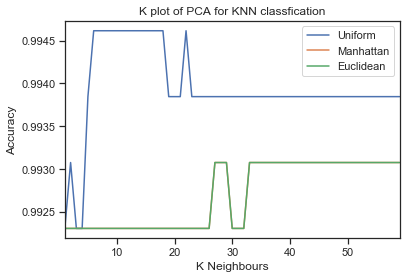

In [29]:
acc_lda[1:].plot.line()
plt.title("K plot of PCA for KNN classfication")
plt.xlabel("K Neighbours")
plt.ylabel("Accuracy")

### PCA vs LDA on Wine dataset

In [30]:
#Normalized wine dataset
wine_data = stats.zscore(wine[D])
wine_column_color = wine[C]
wine_column_quality = wine[L]

           PC1       PC2  color
0     2.778618  3.042330    0.0
1    -0.129793 -0.491683    0.0
2     0.194738  0.378754    0.0
3     1.807306  0.589593    0.0
4     1.807306  0.589593    0.0
...        ...       ...    ...
6492 -2.194947 -0.541709    1.0
6493 -2.043117 -0.895009    1.0
6494 -2.274810 -0.423711    1.0
6495 -2.479566 -0.392779    1.0
6496 -1.258701 -0.383373    1.0

[6497 rows x 3 columns]
           PC1       PC2  quality
0     2.778618  3.042330        6
1    -0.129793 -0.491683        6
2     0.194738  0.378754        6
3     1.807306  0.589593        6
4     1.807306  0.589593        6
...        ...       ...      ...
6492 -2.194947 -0.541709        5
6493 -2.043117 -0.895009        6
6494 -2.274810 -0.423711        6
6495 -2.479566 -0.392779        5
6496 -1.258701 -0.383373        6

[6497 rows x 3 columns]

 Scatter plots: --------------------------------------------------------


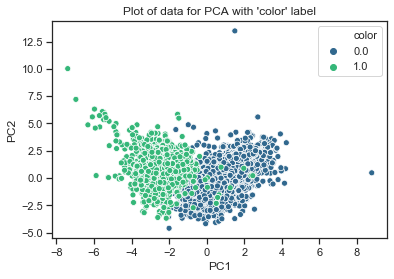

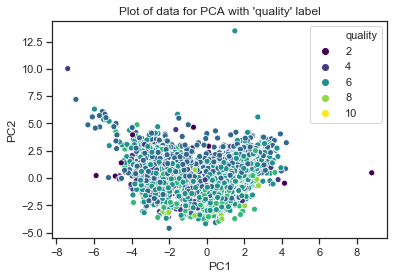

In [31]:
#PCA on wine dataset
pca = PCA(n_components = 2, random_state = 42)
X_pca = pca.fit_transform(wine_data)
X_pca = pd.DataFrame(X_pca)

Xax_color = X_pca.join(wine_column_color.reset_index(drop=True))
Xax_color.columns=['PC1', 'PC2', 'color']
print(Xax_color)

Xax_quality = X_pca.join(wine_column_quality.reset_index(drop=True))
Xax_quality.columns=['PC1', 'PC2', 'quality']
print(Xax_quality)

print("\n Scatter plots: --------------------------------------------------------")
sns.scatterplot(data=Xax_color, x='PC1', y='PC2', hue = 'color', palette='viridis')
plt.title('Plot of data for PCA with \'color\' label')
plt.show()
          
sns.scatterplot(data=Xax_quality, x='PC1', y='PC2', hue = 'quality', palette='viridis')
plt.title('Plot of data for PCA with \'quality\' label')
plt.show()          

             0         1  color
0    -0.781139 -1.508535    0.0
1    -1.372613 -0.173217    0.0
2     0.195948  0.577710    0.0
3    -0.339889 -0.424582    0.0
4    -0.339889 -0.424582    0.0
...        ...       ...    ...
6492 -0.585186  0.322741    1.0
6493  0.484526 -0.475843    1.0
6494  0.222382 -0.983738    1.0
6495 -0.672622  0.581747    1.0
6496  0.508202 -1.708925    1.0

[6497 rows x 3 columns]
             0         1  quality
0    -0.781139 -1.508535        6
1    -1.372613 -0.173217        6
2     0.195948  0.577710        6
3    -0.339889 -0.424582        6
4    -0.339889 -0.424582        6
...        ...       ...      ...
6492 -0.585186  0.322741        5
6493  0.484526 -0.475843        6
6494  0.222382 -0.983738        6
6495 -0.672622  0.581747        5
6496  0.508202 -1.708925        6

[6497 rows x 3 columns]

 Scatter plots: --------------------------------------------------------


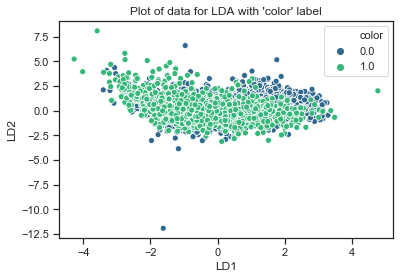

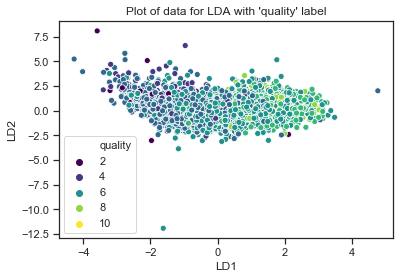

In [32]:
#LDA on wine dataset

wine_df = pd.DataFrame(wine_data, columns = D)

lda = LinearDiscriminantAnalysis(n_components = 2)
X_lda = lda.fit_transform(wine_df, wine_column_quality)
X_lda_df = pd.DataFrame(X_lda)

Xax = X_lda_df.reset_index(drop = True)
Yax = wine_column_color.reset_index(drop = True)
LDA_color = pd.concat([Xax,Yax], axis = 1)
print(LDA_color)

Zax = wine_column_quality.reset_index(drop = True)
LDA_quality = pd.concat([Xax,Zax], axis = 1)
print(LDA_quality)

print("\n Scatter plots: --------------------------------------------------------")
sns.scatterplot(data=LDA_color, x=LDA_color[0], y=LDA_color[1], hue = 'color', palette='viridis')
plt.title('Plot of data for LDA with \'color\' label')
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.show()
          
sns.scatterplot(data=LDA_quality, x=LDA_quality[0], y=LDA_quality[1], hue = 'quality', palette='viridis')
plt.title('Plot of data for LDA with \'quality\' label')
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.show()  

# Question 2: Linear Dimensionality Reduction

In [33]:
#Importing the libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
import random
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib
from scipy import stats
import time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import explained_variance_score

### 2.1 Dataset

In [34]:
#Loading Data set
DataB = pd.read_csv("DataB.csv")
X = DataB.drop(columns = ['Unnamed: 0', 'gnd'])

In [35]:
#checking the percentage of missing values in each variable
DataB.isnull().sum()/len(DataB)*100

Unnamed: 0    0.0
fea.1         0.0
fea.2         0.0
fea.3         0.0
fea.4         0.0
             ... 
fea.781       0.0
fea.782       0.0
fea.783       0.0
fea.784       0.0
gnd           0.0
Length: 786, dtype: float64

### 2.2 Principal Component Analysis (PCA)

In [36]:
#Standardise the dataset
X_std = StandardScaler().fit_transform(X)

In [37]:
#perform eigendecomposition of covariance matrix
cov_mat = np.cov(X_std.T)
print(cov_mat)

[[ 1.00048426e+00 -2.02536284e-02  2.80261755e-02 ...  6.12273392e-04
   1.32442087e-02  3.17637187e-02]
 [-2.02536284e-02  1.00048426e+00  2.16756551e-02 ... -9.75510851e-03
   3.61411028e-02 -1.80895701e-02]
 [ 2.80261755e-02  2.16756551e-02  1.00048426e+00 ...  6.04555535e-03
  -2.77143879e-02  3.10482051e-02]
 ...
 [ 6.12273392e-04 -9.75510851e-03  6.04555535e-03 ...  1.00048426e+00
  -1.11265240e-02 -9.86731912e-03]
 [ 1.32442087e-02  3.61411028e-02 -2.77143879e-02 ... -1.11265240e-02
   1.00048426e+00  1.44399871e-02]
 [ 3.17637187e-02 -1.80895701e-02  3.10482051e-02 ... -9.86731912e-03
   1.44399871e-02  1.00048426e+00]]


#### 2.2.1 
#### (1) Compute the eigenvectors and eigenvalues

In [38]:
#Calculate Eigenvectors and Eigenvalues

eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# print(eig_vals)
# print(eig_vecs)

#sort descending order
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
# for i, j in eigen_pairs:
#     print("Eigen value : ", j , "Eigen vector : ", i)


Text(0, 0.5, 'Eigenvalues')

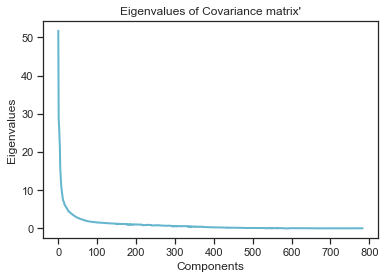

In [39]:
plt.plot(eig_vals, color='c', linewidth = 2)
plt.title("Eigenvalues of Covariance matrix'")
plt.xlabel("Components")
plt.ylabel("Eigenvalues")

#### 2.2.1 
#### (2) Top 20 eigenvalues scatter plot

In [40]:
#Computing the principal component

pca = PCA(n_components = 20, random_state = 42)
X_pca = pca.fit_transform(X_std)
X_pca.shape

(2066, 20)

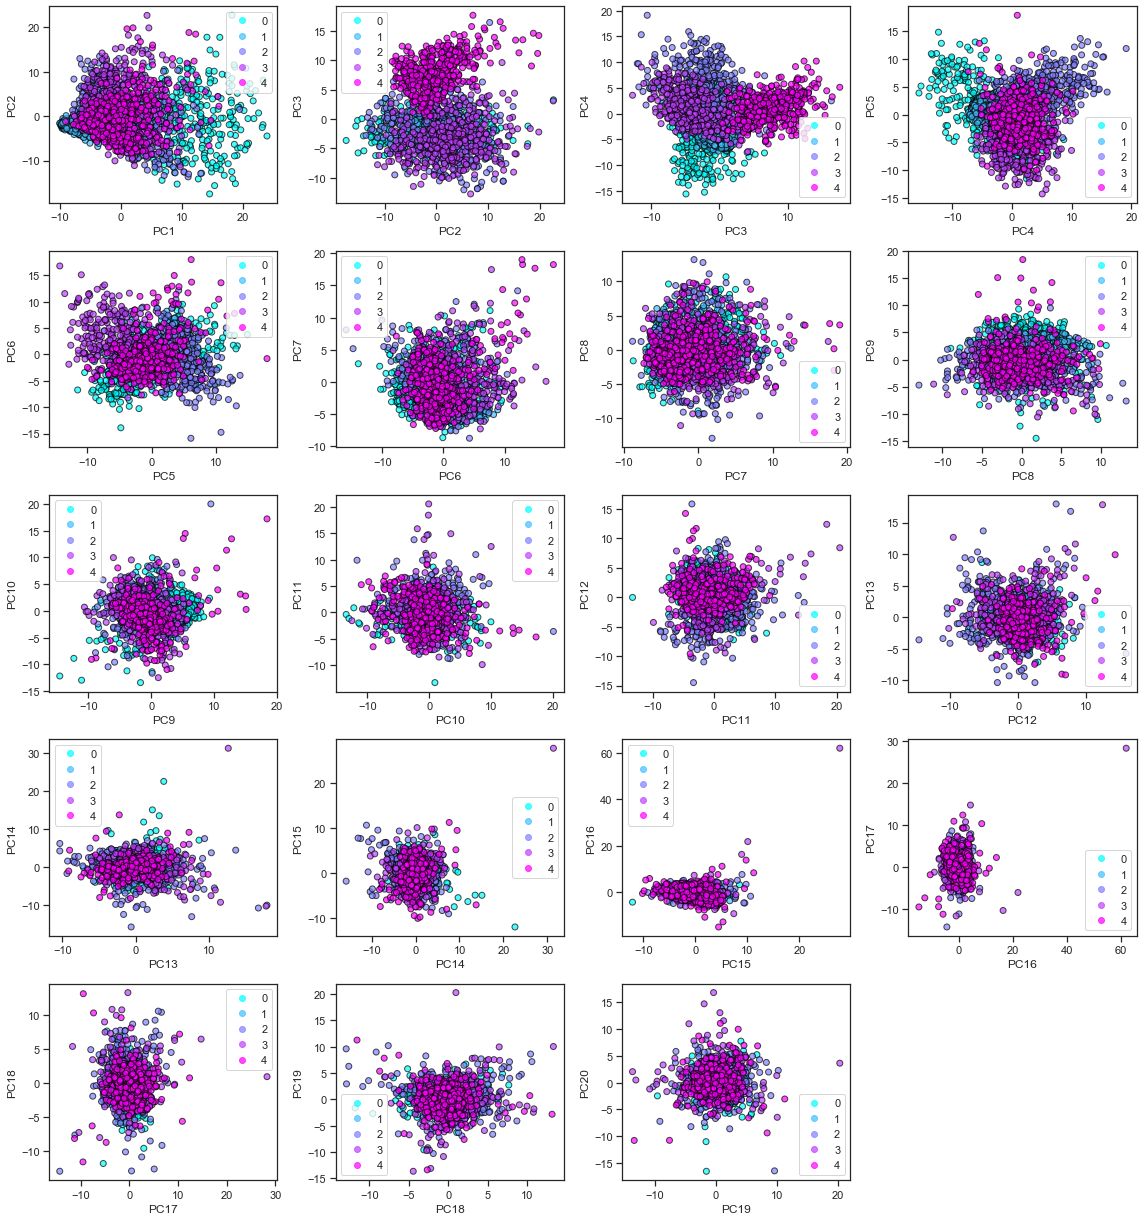

In [41]:
plt.figure(figsize = (16,20))
cmap = matplotlib.cm.get_cmap('cool', 5)
classes=['0', '1', '2', '3', '4', '5']
for i in range(0,20):
    if(i+2 <= 20):
        plt.subplot(6,4,i+1)
        column = DataB['gnd']
        scatter = plt.scatter(X_pca[:,i],X_pca[:,i+1],c = column, cmap = cmap, edgecolors='black', alpha = 0.7)
        plt.legend(handles=scatter.legend_elements()[0], labels=classes)
        pc_x = "PC"+str(i+1)
        pc_y = "PC"+str(i+2)
        plt.xlabel(pc_x)
        plt.ylabel(pc_y)
        plt.tight_layout()

#### 2.2.1 
#### (3) 2 Dimensional PCA representation

In [42]:
#Computing the principal component

pca = PCA(n_components = 6)
X_pca = pca.fit_transform(X_std)
X_pca.shape

x_variance = np.var(X_pca, axis = 0)
x_variance_ratio = x_variance/np.sum(x_variance)
print(x_variance_ratio)

[0.30683222 0.17067382 0.15864432 0.14181115 0.12785361 0.09418488]


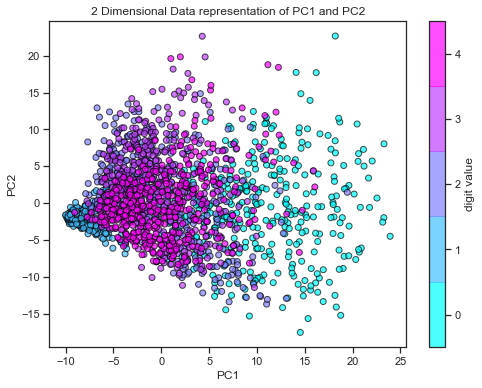

In [43]:
Xax = X_pca[:,0]
Yax = X_pca[:,1]

cmap = matplotlib.cm.get_cmap('cool', 5)
plt.figure(figsize=(8,6))
plt.scatter(Xax, Yax, c = column, cmap = cmap, edgecolors='black', alpha = 0.7)
plt.colorbar( label='digit value')
plt.clim(-0.5, 4.5)#adjust colorbar numbers
plt.title('2 Dimensional Data representation of PC1 and PC2')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

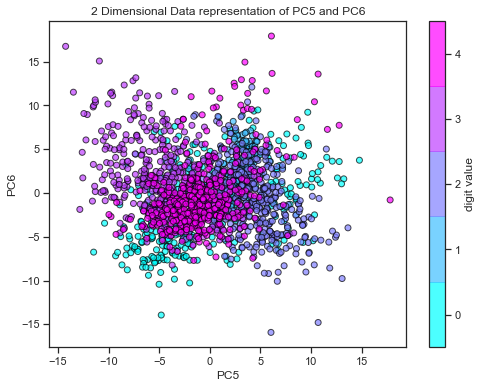

In [44]:
Xax = X_pca[:,4]
Yax = X_pca[:,5]

cmap = matplotlib.cm.get_cmap('cool', 5)
plt.figure(figsize=(8,6))
plt.scatter(Xax, Yax, c = column, cmap = cmap, edgecolors='black', alpha = 0.7)
plt.colorbar( label='digit value')
plt.clim(-0.5, 4.5)#adjust colorbar numbers
plt.title('2 Dimensional Data representation of PC5 and PC6')
plt.xlabel("PC5")
plt.ylabel("PC6")
plt.show()

#### 2.3.1 - 
#### 4. Implement (1) PCA and (2) dual PCA with singular value decomposition

In [45]:
sns.set(style="ticks", color_codes=True)

def normalize(data):
    return stats.zscore(data)

def pca_svd(data):
    
    start_time = time.time()
    
    norm_data = normalize(data)
    
    # norm_data.shape
    dataB_transpose = norm_data.transpose()
    
    d_dt = np.matmul(norm_data,dataB_transpose)
    dt_d = np.matmul(dataB_transpose,norm_data)
    
    eig_val1, eig_vec1 = np.linalg.eig(d_dt)
    eig_val2, eig_vec2 = np.linalg.eig(dt_d)
    
    U = eig_vec1.real
    V = eig_vec2.transpose()
    S = np.sqrt(eig_val2)
    
    print("PCA with SVD\n")
    print('Value of U :\n\n', U)
    print("_____________________________________________________________________________")    
    print('\nValue of V :\n\n', V)
    print("_____________________________________________________________________________")
    print('\nValue of S :\n\n', S)
    print("_____________________________________________________________________________")
    
    #projected data
    p_data = np.dot(U.transpose(),norm_data)
    print("\nProjected data: \n\n", p_data)
    print("_____________________________________________________________________________")
    
    #reconstruction of data
    r_data = np.dot(U, p_data)
    print("\nReconstructed data: \n\n", r_data)
    
    print("\n The time taken for PCA with SVD computation is : %s seconds " % (time.time() - start_time), '\n')
    print("==============================================================================================================")
    
def dual_pca_svd(data):
    
    start_time = time.time()
    
    norm_data = normalize(data)
    
    # norm_data.shape
    dataB_transpose = norm_data.transpose()
    
    dt_d = np.matmul(dataB_transpose,norm_data)
    
    eig_val3, eig_vec3 = np.linalg.eig(dt_d)
    
    #V = eigenvectors of dt_d
    V = eig_vec3
    V_T = V.transpose()
    
    #summation 
    Sqrt_S = np.sqrt(eig_val3)
    S = np.diag(Sqrt_S)
    
    #U = XVS-1
    S_inv = np.linalg.inv(S) 

    U = norm_data.dot(V).dot(S_inv)
    print("Dual PCA with SVD\n\n")
    print('Value of U :\n\n', U)
    print("_____________________________________________________________________________") 
    print('\nValue of V :\n\n', V)
    print("_____________________________________________________________________________") 
    print('\nValue of S :\n\n', S)
    print("_____________________________________________________________________________") 
    
    # Y = UT.X = S.V-1
    U_t = U.transpose()

#   Y1 = U_t.dot(norm_data)
    Y2 = S.dot(V_T)
    
    #Reconstruction of data
    print("\nProjected data: \n")
#   print('\n Y1', Y1, '\n')
    print('Y2', Y2, '\n')
    print("_____________________________________________________________________________")
    #X_C = U.S.V_T = U.Y = X.V.V_T
#   X_C1 = U.dot(Y1)
    print("\nReconstruction data: \n")
    X_C2 = U.dot(S).dot(V_T)
    X_C3 = norm_data.dot(V).dot(V_T)
    print("______________________________________________________________________________")
    print('\n X_C2',X_C2, '\n')
    print("______________________________________________________________________________")
    print('\n X_C3',X_C3, '\n')
    print("______________________________________________________________________________")
    
    print("\n The time taken for Dual PCA computation is : %s seconds " % (time.time() - start_time) , '\n')
    print("==============================================================================================================")
    
    
def main():
    
    pca_svd(X)
    dual_pca_svd(X)
    
    
if __name__== "__main__":
      main()
    

PCA with SVD

Value of U :

 [[ 3.04926733e-02 -2.53481740e-02  2.12352839e-02 ... -4.92039195e-03
  -4.92039195e-03  8.74049523e-03]
 [ 3.49127567e-02 -2.84640034e-02  2.15337072e-02 ... -2.07171858e-05
  -2.07171858e-05  2.82410819e-03]
 [ 1.12852344e-02 -1.92440628e-02  1.23708865e-02 ...  8.31111347e-04
   8.31111347e-04 -2.34179115e-04]
 ...
 [-1.06861152e-03 -3.82856263e-03 -3.44819839e-02 ... -2.96383827e-03
  -2.96383827e-03  3.38778706e-02]
 [-9.52719260e-03 -8.57199741e-03 -2.66778234e-02 ... -4.53889620e-02
  -4.53889620e-02  2.57484257e-02]
 [-1.72609387e-02  1.00940719e-03 -1.76087268e-02 ...  7.04101949e-04
   7.04101949e-04 -3.32822019e-02]]
_____________________________________________________________________________

Value of V :

 [[-0.00197863 -0.00151307  0.00049178 ...  0.0001125   0.00132315
  -0.00591181]
 [ 0.00493308 -0.00640373 -0.00156563 ...  0.00300533  0.00947149
   0.00287621]
 [-0.00037529  0.00258725 -0.00372451 ... -0.00335936  0.00553066
   0.00624184

Dual PCA with SVD


Value of U :

 [[-0.03049267  0.02534817 -0.02123528 ...  0.02183657  0.03087745
  -0.0250709 ]
 [-0.03491276  0.028464   -0.02153371 ...  0.01202478 -0.00745374
  -0.02246928]
 [-0.01128523  0.01924406 -0.01237089 ...  0.0483711   0.01938288
  -0.05693293]
 ...
 [ 0.00106861  0.00382856  0.03448198 ... -0.00241942 -0.03175059
  -0.01359345]
 [ 0.00952719  0.008572    0.02667782 ... -0.0185684  -0.0140117
  -0.02881289]
 [ 0.01726094 -0.00100941  0.01760873 ...  0.0269452   0.00958605
   0.00478745]]
_____________________________________________________________________________

Value of V :

 [[-0.00197863  0.00493308 -0.00037529 ...  0.00013358  0.00062295
   0.00157864]
 [-0.00151307 -0.00640373  0.00258725 ... -0.00274212  0.00837347
  -0.0063992 ]
 [ 0.00049178 -0.00156563 -0.00372451 ... -0.00445827 -0.00683485
   0.00181313]
 ...
 [ 0.0001125   0.00300533 -0.00335936 ... -0.00245866  0.00039547
  -0.00083265]
 [ 0.00132315  0.00947149  0.00553066 ...  0.010263

References:
- http://www.math.uwaterloo.ca/~aghodsib/courses/f06stat890/notes/lec6.pdf
- https://www.youtube.com/watch?v=ulLgihKiNY0
- https://www.youtube.com/watch?v=jeOEXCFK30M
- https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
- https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

### 2.3 Fisher Discriminant Analysis (FDA)

#### 2.3.1 

#### 1. LDA on the dataset

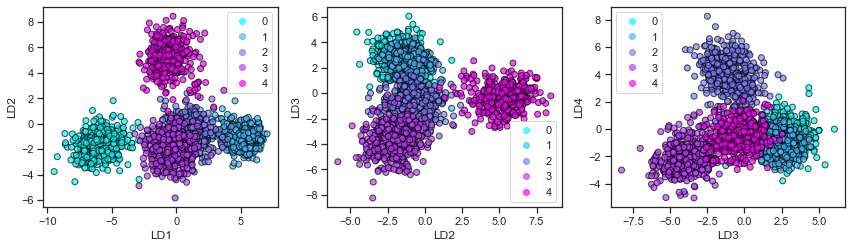

In [46]:
#LDA on dataset

dataB_data = DataB.iloc[:,1:785]
dataB_target = DataB.iloc[:,-1]

dataB_df = pd.DataFrame(dataB_data)

#Standardise the dataset
dataB_std = StandardScaler().fit_transform(dataB_df)
# dataB_target_std = StandardScaler().fit_transform(dataB_target)

#LDA on the dataset B
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(dataB_std, dataB_target)
X_lda_df = pd.DataFrame(X_lda)

Xax = X_lda_df.reset_index(drop = True)
Yax = dataB_target.reset_index(drop = True)

LDA_pd = pd.concat([Xax, Yax], axis = 1)
# print(LDA_pd)

plt.figure(figsize = (12,10))
cmap = matplotlib.cm.get_cmap('cool', 5)
classes=['0', '1', '2', '3', '4', '5']
for i in range(0,3):
    if(i+2 <= 5):
        plt.subplot(3,3,i+1)
        scatter = plt.scatter( x = X_lda[:,i], y = X_lda[:,i+1],c = dataB_target, cmap = cmap, edgecolors='black', alpha = 0.7)
        plt.legend(handles=scatter.legend_elements()[0], labels=classes)
        lda_x = "LD"+str(i+1)
        lda_y = "LD"+str(i+2)
        plt.xlabel(lda_x)
        plt.ylabel(lda_y)
        plt.tight_layout()


References for theory:
- https://arxiv.org/pdf/1906.03148.pdf
- https://arxiv.org/pdf/1906.09436.pdf

# Question 3: Nonlinear Dimensionality Reduction

In [47]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib
import time

## 3.1 Dataset

In [48]:
#Loading Data set
DataB = pd.read_csv("DataB.csv", index_col = 0)
DataB.shape

(2066, 785)

In [49]:
X_std = DataB.drop(axis=1,columns='gnd').values
X_std.shape

(2066, 784)

## 3.2 (1)

### Kernel PCA

In [50]:
#Gaurrian Radial Basis Function(RBF) Kernel PCA
from sklearn.decomposition import KernelPCA

start_time1 = time.time()

kpca_embedding = KernelPCA(n_components = 2, kernel = 'rbf', random_state = 42)
X_kpca = kpca_embedding.fit_transform(X_std)

print("\n The time taken for Kernel PCA is : %s seconds " % (time.time() - start_time1), '\n')


 The time taken for Kernel PCA is : 0.727628231048584 seconds  



### Isomap

In [51]:
#Isomap
from sklearn.manifold import Isomap

start_time2 = time.time()

iso_embedding = Isomap(n_components = 2)
X_iso = iso_embedding.fit_transform(X_std)

print("\n The time taken for Isomap is : %s seconds " % (time.time() - start_time2), '\n')


 The time taken for Isomap is : 6.502657890319824 seconds  



### Locally Linear Embedding

In [52]:
#LLE
from sklearn.manifold import LocallyLinearEmbedding

start_time3 = time.time()

lle_embedding = LocallyLinearEmbedding(n_components = 2,  random_state = 42)
X_lle = lle_embedding.fit_transform(X_std)

print("\n The time taken for LLE is : %s seconds " % (time.time() - start_time3), '\n')


 The time taken for LLE is : 5.488220691680908 seconds  



### Laplacian Eigenmap

In [53]:
#Spectral embedding
from sklearn.manifold import SpectralEmbedding

start_time4 = time.time()

lap_embedding = SpectralEmbedding(n_components=2,  random_state = 42)
X_lap = lap_embedding.fit_transform(X_std)

print("\n The time taken for Laplacian is : %s seconds " % (time.time() - start_time4), '\n')


 The time taken for Laplacian is : 6.253199100494385 seconds  



### t-SNE

In [54]:
#TSNE
from sklearn.manifold import TSNE

start_time5 = time.time()

tsne_embedding = TSNE(n_components=2,  random_state = 42)
X_tsne = tsne_embedding.fit_transform(X_std)

print("\n The time taken for t-SNE is : %s seconds " % (time.time() - start_time5), '\n')


 The time taken for t-SNE is : 15.901886701583862 seconds  



## 3.2 (2) Scatter plot and analysis

Text(0, 0.5, 'Component 2')

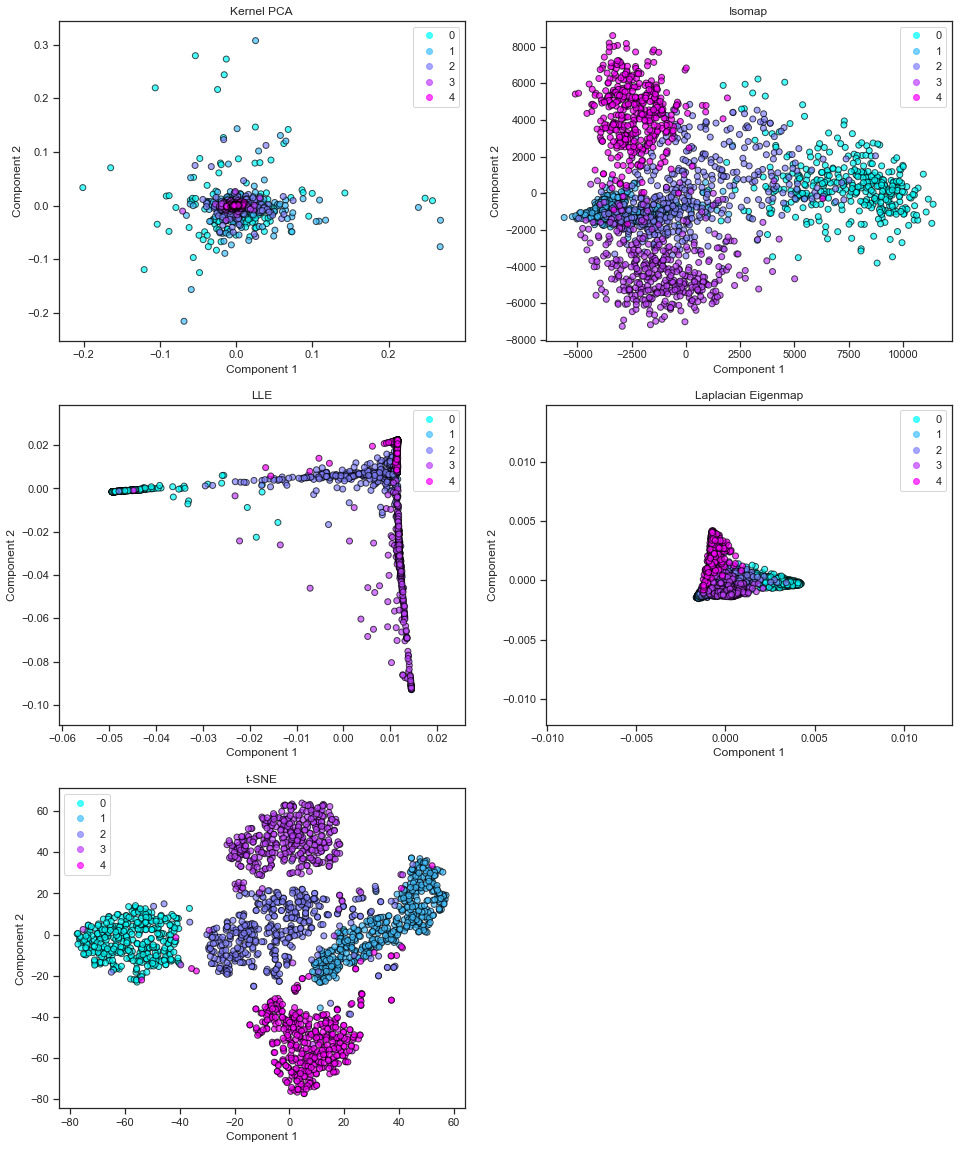

In [55]:
plt.figure(figsize = (16,20))
cmap = matplotlib.cm.get_cmap('cool', 5)
column = DataB['gnd']
classes=['0', '1', '2', '3', '4', '5']

#Scatter plot of RBF Kernel PCA
plt.subplot(3,2,1)
scatter = plt.scatter(X_kpca[:,0],X_kpca[:,1], c = column, cmap = cmap, edgecolors='black', alpha = 0.7)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('Kernel PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

#Scatter plot of Isomap
plt.subplot(3,2,2)
scatter = plt.scatter(X_iso[:,0],X_iso[:,1], c = column, cmap = cmap, edgecolors='black', alpha = 0.7)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('Isomap')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

#Scatter plot of LLE
plt.subplot(3,2,3)
scatter = plt.scatter(X_lle[:,0],X_lle[:,1], c = column, cmap = cmap, edgecolors='black', alpha = 0.7)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('LLE')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

#Scatter plot of Laplacian Eigenmap
plt.subplot(3,2,4)
scatter = plt.scatter(X_lap[:,0],X_lap[:,1], c = column, cmap = cmap, edgecolors='black', alpha = 0.7)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('Laplacian Eigenmap')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

#Scatter plot of t-SNE
plt.subplot(3,2,5)
scatter = plt.scatter(X_tsne[:,0],X_tsne[:,1], c = column, cmap = cmap, edgecolors='black', alpha = 0.7)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.title('t-SNE')
plt.xlabel('Component 1')
plt.ylabel('Component 2')


Observation:

- Visually, it is evident that t-SNE has better seperability of the different classes of the data points
- Considering the computational time taken by different PCA methods, although Kernel PCA takes the least time, class seperability is not very helpful as data points are scattered across the plot. ***IsoMap*** is better when considering the time consumed and also provide class seperability

Which methods do better on which parts of the data? 

**Answer: t-SNE**, because it provides the best seperability of data points of the classes, although computation time is more, class seperability should be considered as the important aspect

